# Bank Note Authentication: Fake vs Real
Banknotes are one of the most important assets of a country. Some miscreants introduce fake notes which bear a resemblance to original notes to create discrepancies in the money in the financial market. It is difficult for humans to tell true and fake banknotes apart especially because they have a lot of similar features.
Hence, there is a dire need for banks and ATMs to implement a system that classifies a note as genuine or fake.Trying to come up with an efficient model that accurately predicts if a note is genuine or not.

*   VWTI: Variance of Wavelet Transformed Image
*   SWTI: Skewness of Wavelet Transformed Image
*   CWTI: Curtosis of Wavelet Transformed Image
*   EI: Entropy of Image
*   Class: Class (1: genuine, 0: forged)



# Importing the nessesary libraries to read and visulaise the data

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
import math

In [4]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [34]:
train

,VWTI,SWTI,CWTI,EI,Class
0,2.263400,-4.4862,3.65580,-0.612510,0
1,3.271800,1.7837,2.11610,0.613340,0
2,-3.941100,-12.8792,13.05970,-3.312500,1
3,0.519500,-3.2633,3.08950,-0.984900,0
4,2.569800,-4.4076,5.98560,0.078002,0
...,...,...,...,...,...
1091,1.640600,3.5488,1.39640,-0.364240,0
1092,-0.048008,-1.6037,8.47560,0.755580,0
1093,2.942100,7.4101,-0.97709,-0.884060,0
1094,1.964700,6.9383,0.57722,0.663770,0


In [5]:
test

,VWTI,SWTI,CWTI,EI
0,-0.40804,0.542140,-0.52725,0.658600
1,-3.71810,-8.508900,12.36300,-0.955180
2,5.50400,10.367100,-4.41300,-4.021100
3,1.68490,8.748900,-1.26410,-1.385800
4,4.74320,2.108600,0.13680,1.654300
...,...,...,...,...
270,-1.00500,0.084831,-0.24620,0.456880
271,2.21230,-5.839500,7.76870,-0.853020
272,4.38460,-4.879400,3.36620,-0.029324
273,3.88400,10.027700,-3.92980,-4.081900


# Exploratory Data Analysis (EDA)

# Cleaning Data
Before running our data through our machine learning algorithm we must clean it: we need to decide what to do with missing data (i.e. NaNs) and convert categorical variables to numbers.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VWTI    1096 non-null   float64
 1   SWTI    1096 non-null   float64
 2   CWTI    1096 non-null   float64
 3   EI      1096 non-null   float64
 4   Class   1096 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 42.9 KB


Don't need to check numerical because all of them are float

* check the null and missing values in the data




In [7]:
train.isnull().sum()

VWTI     0
SWTI     0
CWTI     0
EI       0
Class    0
dtype: int64

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VWTI    275 non-null    float64
 1   SWTI    275 non-null    float64
 2   CWTI    275 non-null    float64
 3   EI      275 non-null    float64
dtypes: float64(4)
memory usage: 8.7 KB




* Describe the data to get the mean,std,min and max



In [18]:
train.describe()

,VWTI,SWTI,CWTI,EI,Class
count,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000
mean,0.463710,1.753259,1.512893,-1.129774,0.452271
std,2.868732,5.912825,4.389388,2.065974,0.497947
min,-7.036400,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.793100,-2.065150,-1.492500,-2.210100,0.000000
50%,0.570600,2.199600,0.676610,-0.556910,0.000000
75%,2.882500,6.670300,3.591600,0.410325,1.000000
max,6.563300,12.730200,17.927400,2.449500,1.000000


In [20]:
train.columns

Index(['VWTI', 'SWTI', 'CWTI', 'EI', 'Class'], dtype='object')

# Duplication
check the duplicated data, I found items and then i droped them and check again

In [9]:
test.isnull().sum()

VWTI    0
SWTI    0
CWTI    0
EI      0
dtype: int64

In [41]:
train.duplicated().sum()


17

In [14]:
train=train.drop_duplicates()

In [43]:
test.duplicated().sum()

2

In [44]:
test=test.drop_duplicates()

# Data Vizulisation
Visulaize the data to get more description about the data
*  countplot form seaborn library



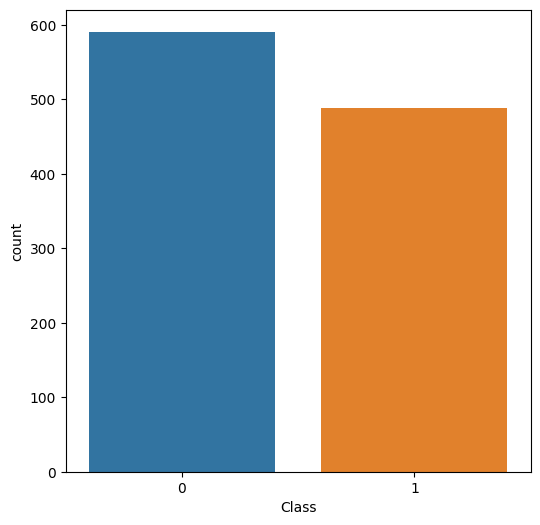

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x ='Class', data = train) 
plt.show()

After print the graph it shows that the data is almost balanced and the numberof real notes is slightly larger than the fake notes by almost 100. 



* Heat map : to represent the correlation between the attributes with the Class
*   using correleation function to look for the correlation in numeric numbers



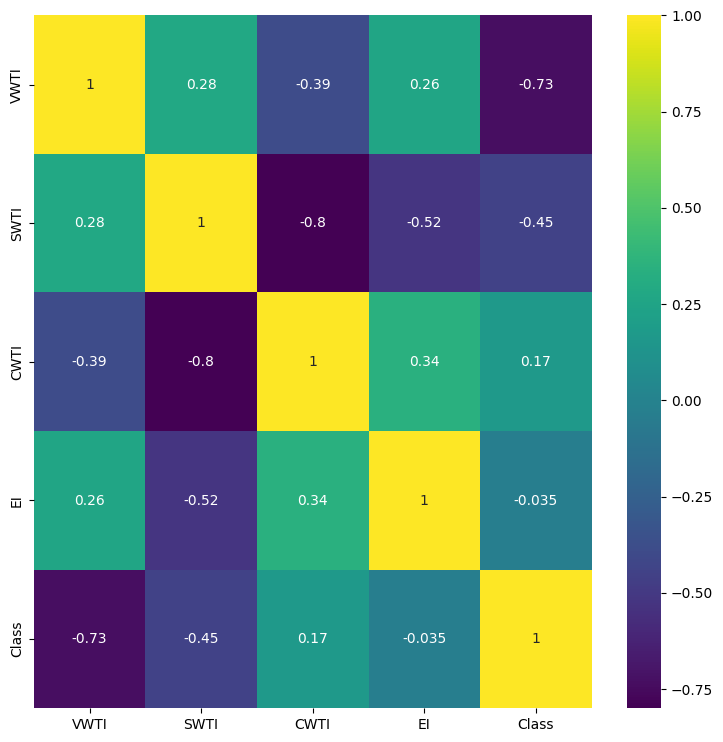

In [11]:
plt.figure(figsize=(9,9))
sns.heatmap(train.corr(),annot=True,cmap='viridis')
plt.show()

In [10]:
train.corr()

,VWTI,SWTI,CWTI,EI,Class
VWTI,1.000000,0.279529,-0.386030,0.261549,-0.733766
SWTI,0.279529,1.000000,-0.800012,-0.523369,-0.447665
CWTI,-0.386030,-0.800012,1.000000,0.339566,0.167561
EI,0.261549,-0.523369,0.339566,1.000000,-0.035046
Class,-0.733766,-0.447665,0.167561,-0.035046,1.000000


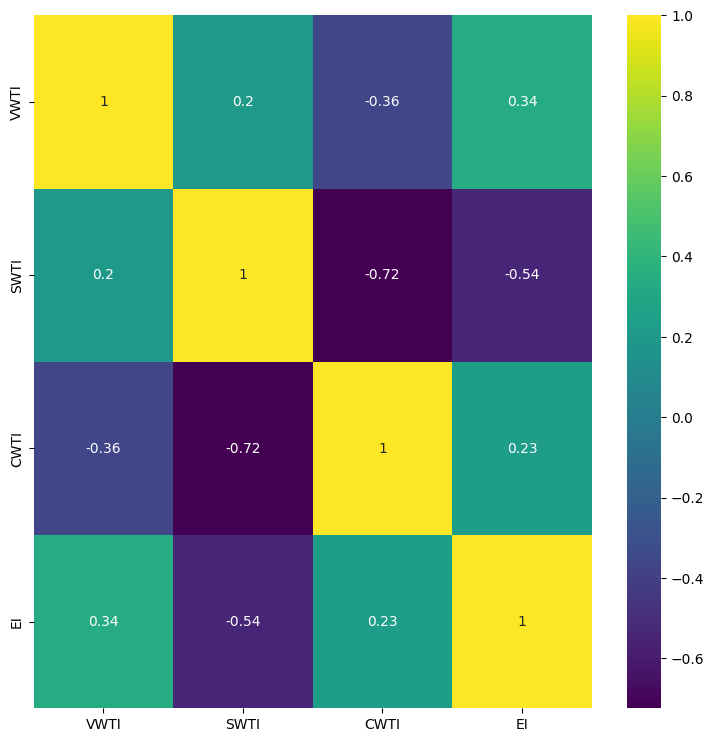

In [13]:
plt.figure(figsize=(9,9))
sns.heatmap(test.corr(),annot=True,cmap='viridis')
plt.show()

In [12]:
test.corr()

,VWTI,SWTI,CWTI,EI
VWTI,1.000000,0.198733,-0.360863,0.335024
SWTI,0.198733,1.000000,-0.723929,-0.539445
CWTI,-0.360863,-0.723929,1.000000,0.231048
EI,0.335024,-0.539445,0.231048,1.000000


The columuns *VWTI* and *SWTI* are highly negatively correlated with **class** while the *EI* is slightly negatively correlated with the **class**. in the other hand, CWTI  is positively corellated with the class.

Because of the number of features in data set is not larger enough so i decide not to drop the *EI* at this stage and i will calculate the accuracy from the model first and then as a second case i will drop the *EI* and see the difference in accuracy getting from the model.



* plot the histogram and pairplot for the data to see the distribution of the numerical data in each columns



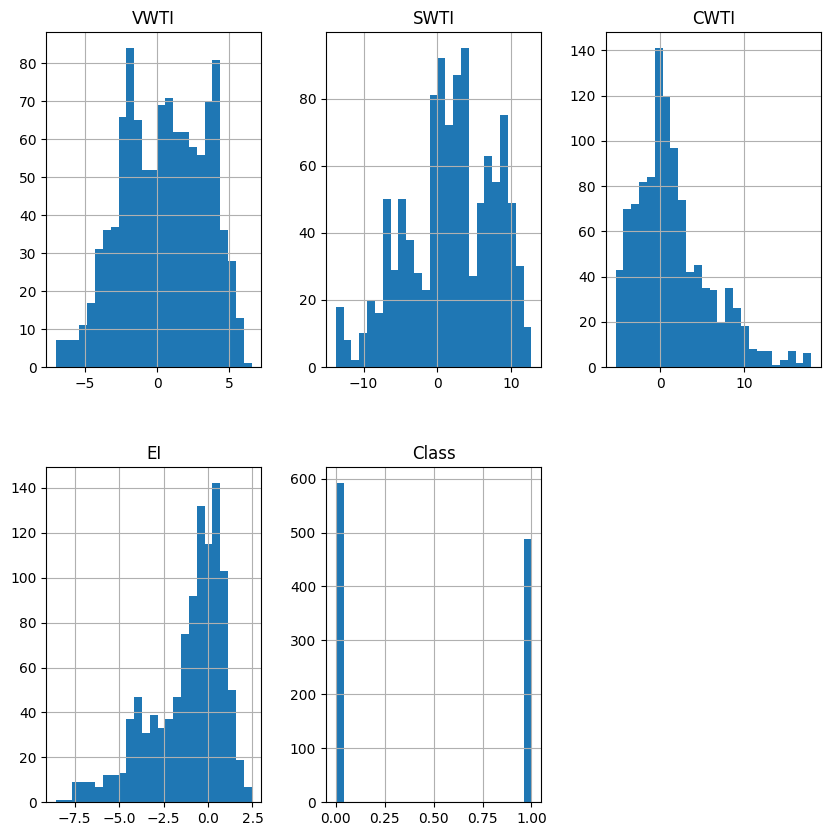

In [50]:
train.hist(bins=25,figsize=(10,10),layout=(2,3))
plt.show()

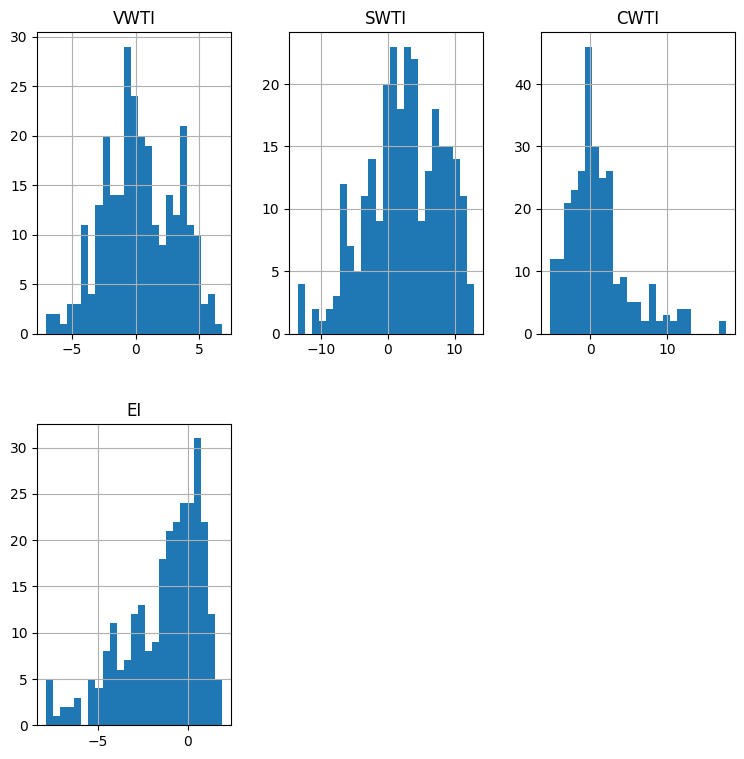

In [16]:
test.hist(bins=25,figsize=(9,9),layout=(2,3))
plt.show()

In [51]:
train.skew()

VWTI    -0.184417
SWTI    -0.398922
CWTI     1.030113
EI      -1.032282
Class    0.192060
dtype: float64

From the above result, we can check which variable is normally distributed and which is not.

The variables with skewness > 1 such as CWTI are highly positively skewed.

The variables with skewness < -1 such as EI are highly negatively skewed.

The variables with -0.5 < skewness < 0.5 are normally distributed such as VWTI and SWTI.

# Normalize the Data

In [41]:
X = train.drop(['Class'],axis=1)
Y = train['Class']

In [42]:
X_test = test

In [43]:
min_max_scaler = preprocessing.MinMaxScaler()

X_scaled = min_max_scaler.fit_transform(X)

print(X_scaled)

[[0.68382391 0.35040542 0.38520258 0.72157724]
 [0.7579726  0.58697596 0.31887479 0.83304145]
 [0.22760061 0.03372788 0.79030736 0.47607227]
 ...
 [0.73372942 0.79926651 0.18562518 0.69688571]
 [0.66186019 0.78146495 0.25258233 0.83762696]
 [0.50811121 0.90912075 0.06780537 0.22092801]]


In [44]:
min_max_scaler = preprocessing.MinMaxScaler()

X_test = min_max_scaler.fit_transform(X_test)

print(X_test)

[[0.47840974 0.5308244  0.20480625 0.87043254]
 [0.2397075  0.1886236  0.76786892 0.70576615]
 [0.9047516  0.90228549 0.0350717  0.39292675]
 ...
 [0.824027   0.32584737 0.37487715 0.80023836]
 [0.78792665 0.88945349 0.0561785  0.38672286]
 [0.78796991 0.39563319 0.33849937 0.82385641]]


In [45]:
X_train, X_vald, y_train, y_vald = train_test_split(X,Y, test_size=0.25, random_state=2, stratify=Y)  

## Decision Tree Classifier
I will use difrent models to train the data and get results and will evaluate each model

In [46]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 4, random_state=7) # Choose tree depth
decision_tree.fit(X_train,y_train)
y_pred=decision_tree.predict(X_vald)


In [58]:
from sklearn import metrics
# Print the model accuracy (how often is the classifier correct?)
print("Accuracy on validation set:",np.round(metrics.accuracy_score(y_vald, y_pred),2))

Accuracy on validation set: 0.96


In [48]:

X_names = ['VWTI','SWTI','CWTI','EI']
y_names=['Real','Fake'] # Target labels
# Print out the feature importances
feature_importances_dict = {}
for i, name in enumerate(X_names): feature_importances_dict.update({name : decision_tree.feature_importances_[i]})
# Sort features in descending order of importance (need to use reverse=True for descending)  
feature_importances_sorted = dict(sorted(feature_importances_dict.items(), key=lambda x:x[1], reverse=True)) 
# items() method returns (key,value) tuple
print('Features in order of importance:')   
for key in feature_importances_sorted:
    print(key)

Features in order of importance:
VWTI
CWTI
SWTI
EI


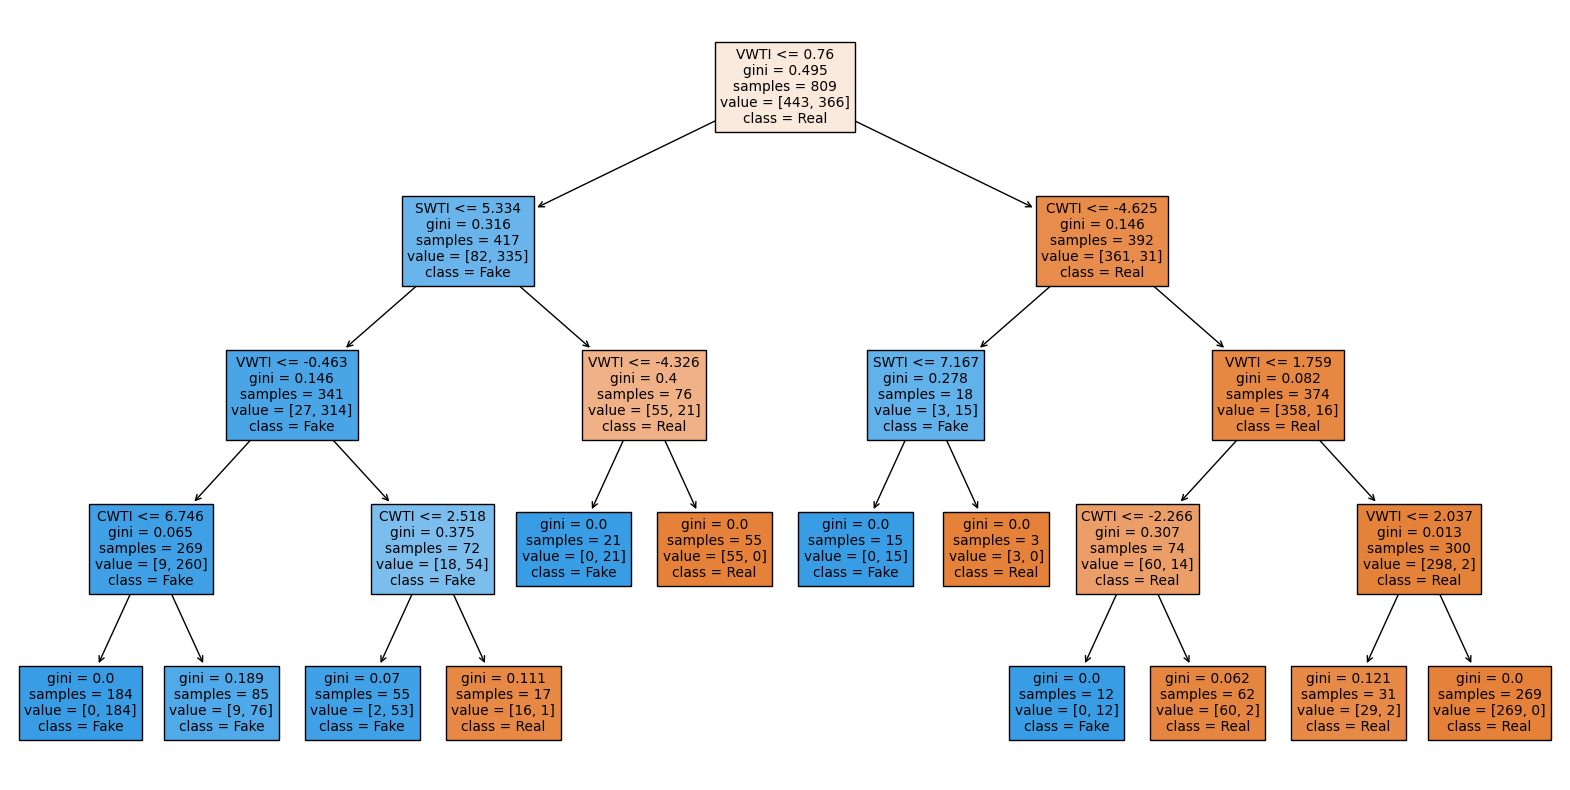

In [49]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(decision_tree,feature_names=X_names,class_names=y_names,filled=True)

In [61]:
# prdection on test data by decision tree
y_prdect_DT=decision_tree.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,bootstrap=True,max_features='auto',criterion='gini',max_depth=None,random_state=3,oob_score=True)
forest.fit(X_train,y_train)
y_train_pred = forest.predict(X_train)
print("Accuracy on training set:",round(metrics.accuracy_score(y_train, y_train_pred),2))
y_vald_pred = forest.predict(X_vald)
print("Accuracy on validation set:",round(metrics.accuracy_score(y_vald, y_vald_pred),2))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy on training set: 1.0
Accuracy on validation set: 0.99


In [60]:
# prdection on test data by random forest
y_prdect_RF=forest.predict(X_test)
print(y_prdect_RF)

[1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
